# **Obtención de un Modelo y Predicción**

Archivos con los que se trabajará

*  [train.csv](https://drive.google.com/file/d/1fpy7JaVdFlFPHa3kWKmem_E4O7NqhBax/view?usp=sharing)
- [test.csv](https://drive.google.com/file/d/1z927EgBNSOJ3iWorIGz2XEjlrfD0Koaw/view?usp=sharing)

Primero se debe identificar si se trata de un problema de regresión o clasificación. Como trabajaremos con un dataset que contiene información sobre personas y se debe predecir si la persona tiene un salario anual mayor o menor a 50K dólares. Nos encontramos frente a la predicción de clases. Primer clase "Salario <= 50K"; segunda clase "Salario > 50K".

## **Análisis**  **Exploratorio** **de** **los** **Datos** - **EDA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive # La usamos para montar nuestra unidad de Google Drive
drive.mount('/content/drive') # Montamos nuestra unidad de Google Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Data_Science_2021/Entregas/Entrega _1/train.csv',na_values='?')
df_test= pd.read_csv('/content/drive/MyDrive/Data_Science_2021/Entregas/Entrega _1/test.csv',na_values='?')

Empezamos a explorar. 

In [ ]:
df_train.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,ID
0,24466,30,Local-gov,HS-grad,9,Divorced,Protective-serv,Own-child,White,Female,0,0,32,United-States,<=50K,24451
1,985,37,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1848,40,United-States,>50K,985
2,30250,41,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,>50K,30229
3,7107,45,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K,7107
4,27656,28,Private,HS-grad,9,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K,27639


In [ ]:
df_test.head()

,index,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,ID
0,3643,53,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,3137,0,40,United-States,3643
1,16041,18,NaN,11th,7,Never-married,NaN,Own-child,White,Male,0,0,25,United-States,16036
2,9403,42,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,37,United-States,9401
3,17909,49,Self-emp-inc,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,60,United-States,17903
4,5198,58,Local-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,United-States,5198


Veremos si las columnas 'ID' e 'index' son duplicados una de la otra para analizar que estrategia tomar.

In [ ]:
df_train[['index','ID']].sample(10)

,index,ID
11227,30562,30541
2207,1595,1595
17226,8540,8539
17023,26608,26593
10117,9888,9886
15149,3088,3088
25144,8602,8601
3406,2702,2702
2638,9289,9287
16784,32537,32513


Si bien algunos valores de ambas columnas son iguales, otros no lo son, por lo que dejaremos ambas columnas y reubicaremos la columna 'ID' al comienzo.

In [ ]:
df_train.columns

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'ID'],
      dtype='object')

In [ ]:
df_train = df_train.reindex(columns=['index','ID','age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country', 'income'])


In [ ]:
df_test.columns

Index(['index', 'age', 'workclass', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'ID'],
      dtype='object')

In [ ]:
df_test = df_test.reindex(columns=['index','ID','age', 'workclass', 'education', 'education.num', 'marital.status',
       'occupation', 'relationship', 'race', 'sex', 'capital.gain',
       'capital.loss', 'hours.per.week', 'native.country'])


In [ ]:
df_train = df_train.set_index('index').sort_index()
df_test = df_test.set_index('index').sort_index()

La columna 'index' (que vimos que no era un duplicado de la columna 'ID'), seteándola como indice y luego ordenándola, vemos que sus valores se discontinúan. Por lo que, finalmente, decidimos eliminarla y resetear el indice numérico. 


In [ ]:
df_train = df_train.reset_index()
df_test = df_test.reset_index()

In [ ]:
df_train = df_train.drop('index', axis = 1)
df_test = df_test.drop('index', axis = 1)

In [ ]:
df_train.head(10)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,1,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,2,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,3,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,4,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,5,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,7,74,State-gov,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
7,9,41,Private,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,NaN,>50K
8,10,45,Private,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
9,11,38,Self-emp-not-inc,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K


In [ ]:
df_test.head(10)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,6,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States
1,8,68,Federal-gov,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States
2,30,23,Private,Some-college,10,Separated,Other-service,Not-in-family,White,Male,0,2559,40,United-States
3,33,51,Private,Bachelors,13,Divorced,Exec-managerial,Not-in-family,White,Male,0,2559,50,United-States
4,34,60,Self-emp-not-inc,HS-grad,9,Never-married,Exec-managerial,Not-in-family,Black,Male,0,2559,50,United-States
5,46,71,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,2467,52,United-States
6,52,51,State-gov,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Male,0,2444,39,United-States
7,83,58,Self-emp-not-inc,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,40,United-States
8,92,39,Private,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,2415,99,United-States
9,96,46,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,2415,80,United-States


Veamos que significan cada una de las columnas:







* ID: identificador del trabajador;
* age: edad de la persona;
* workclass: tipo de trabajo;
* education: nivel de estudios alcanzados;
* education.num: codificación respecto al nivel de estudios alcanzados;
* marital.status: estado civil;
* occupation: ocupación/ empleo;
* relationship: relación de parentezco;
* race: raza;
* sex: sexo/género;
* capital.gain: capital ganado;
* capital.loss: capital perdido;
* hours.per.week: horas trabajadas por semana;
* native.country: país de origen;
* income: ingresos (nuestro target).


Qué tipos de datos contienen las columnas?

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27656 entries, 0 to 27655
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              27656 non-null  int64 
 1   age             27656 non-null  int64 
 2   workclass       26117 non-null  object
 3   education       27656 non-null  object
 4   education.num   27656 non-null  int64 
 5   marital.status  27656 non-null  object
 6   occupation      26110 non-null  object
 7   relationship    27656 non-null  object
 8   race            27656 non-null  object
 9   sex             27656 non-null  object
 10  capital.gain    27656 non-null  int64 
 11  capital.loss    27656 non-null  int64 
 12  hours.per.week  27656 non-null  int64 
 13  native.country  27152 non-null  object
 14  income          27656 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.2+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4881 entries, 0 to 4880
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              4881 non-null   int64 
 1   age             4881 non-null   int64 
 2   workclass       4584 non-null   object
 3   education       4881 non-null   object
 4   education.num   4881 non-null   int64 
 5   marital.status  4881 non-null   object
 6   occupation      4584 non-null   object
 7   relationship    4881 non-null   object
 8   race            4881 non-null   object
 9   sex             4881 non-null   object
 10  capital.gain    4881 non-null   int64 
 11  capital.loss    4881 non-null   int64 
 12  hours.per.week  4881 non-null   int64 
 13  native.country  4803 non-null   object
dtypes: int64(6), object(8)
memory usage: 534.0+ KB


¿ Cuántas filas y columnas tiene el dataset ?

In [ ]:
df_train.shape

(27656, 15)

In [ ]:
df_test.shape

(4881, 14)

Tenemos valores nulos?

In [ ]:
df_train.isna().sum()

ID                   0
age                  0
workclass         1539
education            0
education.num        0
marital.status       0
occupation        1546
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     504
income               0
dtype: int64

In [ ]:
df_test.isna().sum()

ID                  0
age                 0
workclass         297
education           0
education.num       0
marital.status      0
occupation        297
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country     78
dtype: int64

¿ Qué porcentaje de nulos hay por columna ?

In [ ]:
round(df_train.isnull().mean()*100,2)

ID                0.00
age               0.00
workclass         5.56
education         0.00
education.num     0.00
marital.status    0.00
occupation        5.59
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.82
income            0.00
dtype: float64

In [ ]:
round(df_test.isnull().mean()*100,2)

ID                0.00
age               0.00
workclass         6.08
education         0.00
education.num     0.00
marital.status    0.00
occupation        6.08
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    1.60
dtype: float64

Pudiésemos ahora eliminar la columna 'education' dado que en la columna contigua 'education.num' ya se encuentra codificada el nivel de estudios alcanzados y en el órden académico correspondiente, es decir '1' corresponde a 'Preschool'; '2' corresponde a '1st-4th'; '3' a '5th-6th'; '4' a '7th-8th' así sucesivamente.

In [ ]:
df_train.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', 'Doctorate', 'Prof-school',
       'Bachelors', 'Masters', '11th', 'Assoc-acdm', 'Assoc-voc',
       '1st-4th', '5th-6th', '10th', '12th', '9th', 'Preschool'],
      dtype=object)

In [ ]:
df_train['education.num'].unique()

array([ 9, 10,  4, 16, 15, 13, 14,  7, 12, 11,  2,  3,  6,  8,  5,  1])

In [ ]:
df_train = df_train.drop('education', axis = 1)
df_test = df_test.drop('education', axis = 1)

Ahora analicemos la columna 'native.country'.
Basándonos en https://wits.worldbank.org/wits/wits/WITSHELP-es/content/codes/country_codes.htm los distintos países poseen una determinada codificación. Por lo que, seguidamente, crearemos un diccionario y emplearemos la función .replace().

In [ ]:
df_train['native.country'].unique()

array(['United-States', nan, 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Poland', 'Iran', 'England',
       'Germany', 'Japan', 'Hong', 'Honduras', 'Puerto-Rico', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Italy', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [ ]:
country_cod ={
              'United-States':'840',
              'Mexico':'484',
              'Greece':'300',
              'Vietnam':'704',
              'China':'156',
              'Taiwan':'158',
              'India':'356',
              'Philippines':'608',
              'Trinadad&Tobago':'780',
              'Canada':'124',
              'South':'1',
              'Holand-Netherlands':'528',
              'Poland':'616',
              'Iran':'364',
              'England':'826',
              'Germany':'276',
              'Japan':'392',
              'Hong':'344',
              'Honduras':'340',
              'Puerto-Rico':'630',
              'Cuba':'192',
              'Ireland':'372',
              'Cambodia':'116',
              'Peru':'604',
              'Nicaragua':'558',
              'Dominican-Republic':'214',
              'Haiti':'332',
              'El-Salvador':'222',
              'Hungary':'348',
              'Columbia':'170',
              'Guatemala':'320',
              'Jamaica':'388',
              'Italy':'380',
              'Ecuador':'218',
              'France':'250',
              'Yugoslavia':'890',
              'Scotland':'826',
              'Portugal':'620',
              'Laos':'2',
              'Thailand':'764',
              'Outlying-US(Guam-USVI-etc)':'3'

            }

In [ ]:
df_train['native.country'] = df_train['native.country'].replace(country_cod)
df_test['native.country'] = df_test['native.country'].replace(country_cod)

Respecto a los nulos en ésta columna, debido a que no poseemos mucha información (basandonos en las otras columnas) como para realizar una imputación multivariante y a que no tiene mucho sentido tomar "la media de códigos" como para imputar dicho valor a los faltantes, es que decidimos eliminar las filas nulas correspondientes a la columna 'native.country' (considerando, además, que su porcentaje de nulos no es muy elevado).

In [ ]:
df_train = df_train.dropna(how='all', subset=['native.country'])
df_test = df_test.dropna(how='all', subset=['native.country'])

In [ ]:
round(df_train.isnull().mean()*100,2)

ID                0.00
age               0.00
workclass         5.58
education.num     0.00
marital.status    0.00
occupation        5.61
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    0.00
income            0.00
dtype: float64

In [ ]:
round(df_test.isnull().mean()*100,2)

ID                0.0
age               0.0
workclass         6.1
education.num     0.0
marital.status    0.0
occupation        6.1
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
dtype: float64

Ahora analicemos las columnas 'workclass' y 'occupation' para ver que medidas tomar.

---



In [ ]:
df_train[['workclass','occupation']].sample(30)

,workclass,occupation
13083,Private,Craft-repair
5331,Private,Exec-managerial
12426,Self-emp-inc,Exec-managerial
15936,Private,Adm-clerical
15894,Private,Exec-managerial
8819,Self-emp-not-inc,Craft-repair
14846,Private,Prof-specialty
20159,Private,Transport-moving
2754,Local-gov,Prof-specialty
19787,Private,Machine-op-inspct


A simple vista vemos que hay coincidencia de filas nulas de una columna respecto a la otra. Por lo que eliminaremos dichas filas correspondiente a la columna de menor porcentaje de nulos, es decir, correspondiente a la columna 'workclass' en el dataset de train. En tanto que en el set de test es indistinto eliminar los nulos de una u otra columna.

In [ ]:
df_train = df_train.dropna(subset=['workclass'])
df_test = df_test.dropna(subset=['workclass'])

In [ ]:
round(df_train.isnull().mean()*100,2)

ID                0.00
age               0.00
workclass         0.00
education.num     0.00
marital.status    0.00
occupation        0.03
relationship      0.00
race              0.00
sex               0.00
capital.gain      0.00
capital.loss      0.00
hours.per.week    0.00
native.country    0.00
income            0.00
dtype: float64

In [ ]:
df_train['occupation'].isna().sum()

7

In [ ]:
df_train[df_train["occupation"].isna() == True]

,ID,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7565,8872,18,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,40,840,<=50K
11617,13672,23,Never-worked,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,840,<=50K
14500,17084,17,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,30,840,<=50K
18609,21925,18,Never-worked,7,Never-married,NaN,Own-child,White,Female,0,0,10,840,<=50K
20787,24468,20,Never-worked,10,Never-married,NaN,Own-child,Black,Male,0,0,40,840,<=50K
27456,32308,30,Never-worked,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,840,<=50K
27462,32315,18,Never-worked,10,Never-married,NaN,Own-child,White,Male,0,0,4,840,<=50K


Ahora veamos si en la columna 'workclass' hay otros casos en que su valor diga 'Never-worked' y en la columna 'occupation' no diga NAN.


In [ ]:
df_train[df_train["workclass"] == 'Never-worked']

,ID,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
7565,8872,18,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,40,840,<=50K
11617,13672,23,Never-worked,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,840,<=50K
14500,17084,17,Never-worked,6,Never-married,NaN,Own-child,White,Male,0,0,30,840,<=50K
18609,21925,18,Never-worked,7,Never-married,NaN,Own-child,White,Female,0,0,10,840,<=50K
20787,24468,20,Never-worked,10,Never-married,NaN,Own-child,Black,Male,0,0,40,840,<=50K
27456,32308,30,Never-worked,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,840,<=50K
27462,32315,18,Never-worked,10,Never-married,NaN,Own-child,White,Male,0,0,4,840,<=50K


Por lo que vemos no hay más casos (justo se corresponden a las 7 filas  en las que la columna 'occupation' figura NAN). Por lo que, para no eliminar esos 7 registros, los imputaremos.


In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
simple_imp = SimpleImputer(missing_values=np.nan, strategy='constant')

In [ ]:
df_train['occupation'] =simple_imp.fit_transform(df_train[['occupation']]) 

In [ ]:
round(df_train.isnull().mean()*100,2)

ID                0.0
age               0.0
workclass         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

In [ ]:
round(df_test.isnull().mean()*100,2)

ID                0.0
age               0.0
workclass         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
dtype: float64

Finalmente, logramos llegar a que nuestro dataset no contenga nulos.

### Análisis varibales categóricas

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25636 entries, 1 to 27655
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              25636 non-null  int64 
 1   age             25636 non-null  int64 
 2   workclass       25636 non-null  object
 3   education.num   25636 non-null  int64 
 4   marital.status  25636 non-null  object
 5   occupation      25636 non-null  object
 6   relationship    25636 non-null  object
 7   race            25636 non-null  object
 8   sex             25636 non-null  object
 9   capital.gain    25636 non-null  int64 
 10  capital.loss    25636 non-null  int64 
 11  hours.per.week  25636 non-null  int64 
 12  native.country  25636 non-null  object
 13  income          25636 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.9+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4510 entries, 0 to 4880
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              4510 non-null   int64 
 1   age             4510 non-null   int64 
 2   workclass       4510 non-null   object
 3   education.num   4510 non-null   int64 
 4   marital.status  4510 non-null   object
 5   occupation      4510 non-null   object
 6   relationship    4510 non-null   object
 7   race            4510 non-null   object
 8   sex             4510 non-null   object
 9   capital.gain    4510 non-null   int64 
 10  capital.loss    4510 non-null   int64 
 11  hours.per.week  4510 non-null   int64 
 12  native.country  4510 non-null   object
dtypes: int64(6), object(7)
memory usage: 493.3+ KB


Hay 8 columnas object en el dataset de train. Sin embargo, una de ellas no debiése serlo, la columna 'income'. Veamos qué valores contiene

In [ ]:
df_train['income'].unique()

array(['<=50K', '>50K'], dtype=object)

Notamos que es una variable binaria. Por lo que la preprocesaremos y le haremos un one hot encoding.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
encoded_income = enc.fit_transform(df_train.income.values.reshape(-1,1))

In [ ]:
encoded_income_columns = enc.get_feature_names(['income'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
encoded_income_df = pd.DataFrame(data=encoded_income, columns= encoded_income_columns, dtype=int)
encoded_income_df

,income_<=50K,income_>50K
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
25631,1,0
25632,0,1
25633,1,0
25634,1,0


In [ ]:
df_train = pd.concat([df_train.reset_index(drop=True), encoded_income_df], axis=1).drop(['income','income_<=50K'], axis = 1)

In [ ]:
df_train.head()

,ID,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_>50K
0,1,82,Private,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,840,0
1,3,54,Private,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,840,0
2,4,41,Private,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,840,0
3,5,34,Private,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,840,0
4,7,74,State-gov,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,840,1


Ahora con las columnas de tipo object que están bien que así lo sean, veamos cuántos valores contienen y a continuación realizaremos un gráfico acorde a la variable y su cantidad de valores. 

In [ ]:
columns_cat = ['workclass', 'marital.status','occupation','relationship','race', 'sex','native.country']

In [ ]:
print('Cantidad de valores distintos en variables categóricas en el dataset de train')
for i in columns_cat:
  cant_de_unicos = df_train[i].nunique()
  print(f"'{i}'  {cant_de_unicos}")

Cantidad de valores distintos en variables categóricas en el dataset de train
'workclass'  8
'marital.status'  7
'occupation'  15
'relationship'  6
'race'  5
'sex'  2
'native.country'  40


In [ ]:
print('Cantidad de valores distintos en variables categóricas en el dataset de test')
for i in columns_cat:
  cant_de_unicos = df_test[i].nunique()
  print(f"'{i}'  {cant_de_unicos}")

Cantidad de valores distintos en variables categóricas en el dataset de test
'workclass'  6
'marital.status'  7
'occupation'  14
'relationship'  6
'race'  5
'sex'  2
'native.country'  39


A continuación, para la variable binaria 'sex' haremos un countplot mientras que para las demás usaremos un histograma.

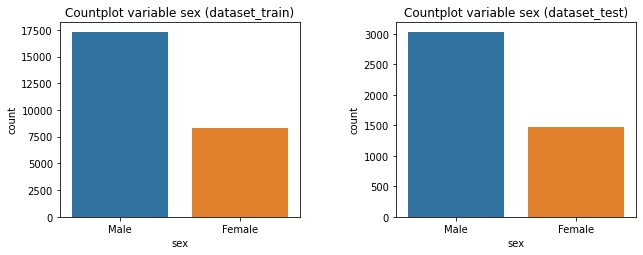

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

axes[0].set_title("Countplot variable sex (dataset_train)")
sns.countplot(x= df_train.sex, order= df_train['sex'].value_counts().index, ax=axes[0])
axes[1].set_title("Countplot variable sex (dataset_test)")
sns.countplot(x= df_test.sex, order= df_test['sex'].value_counts().index, ax=axes[1])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [ ]:
print("En el dataset de train la distribución de género es:")
print(df_train['sex'].value_counts())
print("---------------------")
print("En el dataset de test la distribución de género es:")
print(df_test['sex'].value_counts())

En el dataset de train la distribución de género es:
Male      17333
Female     8303
Name: sex, dtype: int64
---------------------
En el dataset de test la distribución de género es:
Male      3038
Female    1472
Name: sex, dtype: int64


In [ ]:
columna_1 = ['workclass', 'marital.status','occupation','relationship','race']

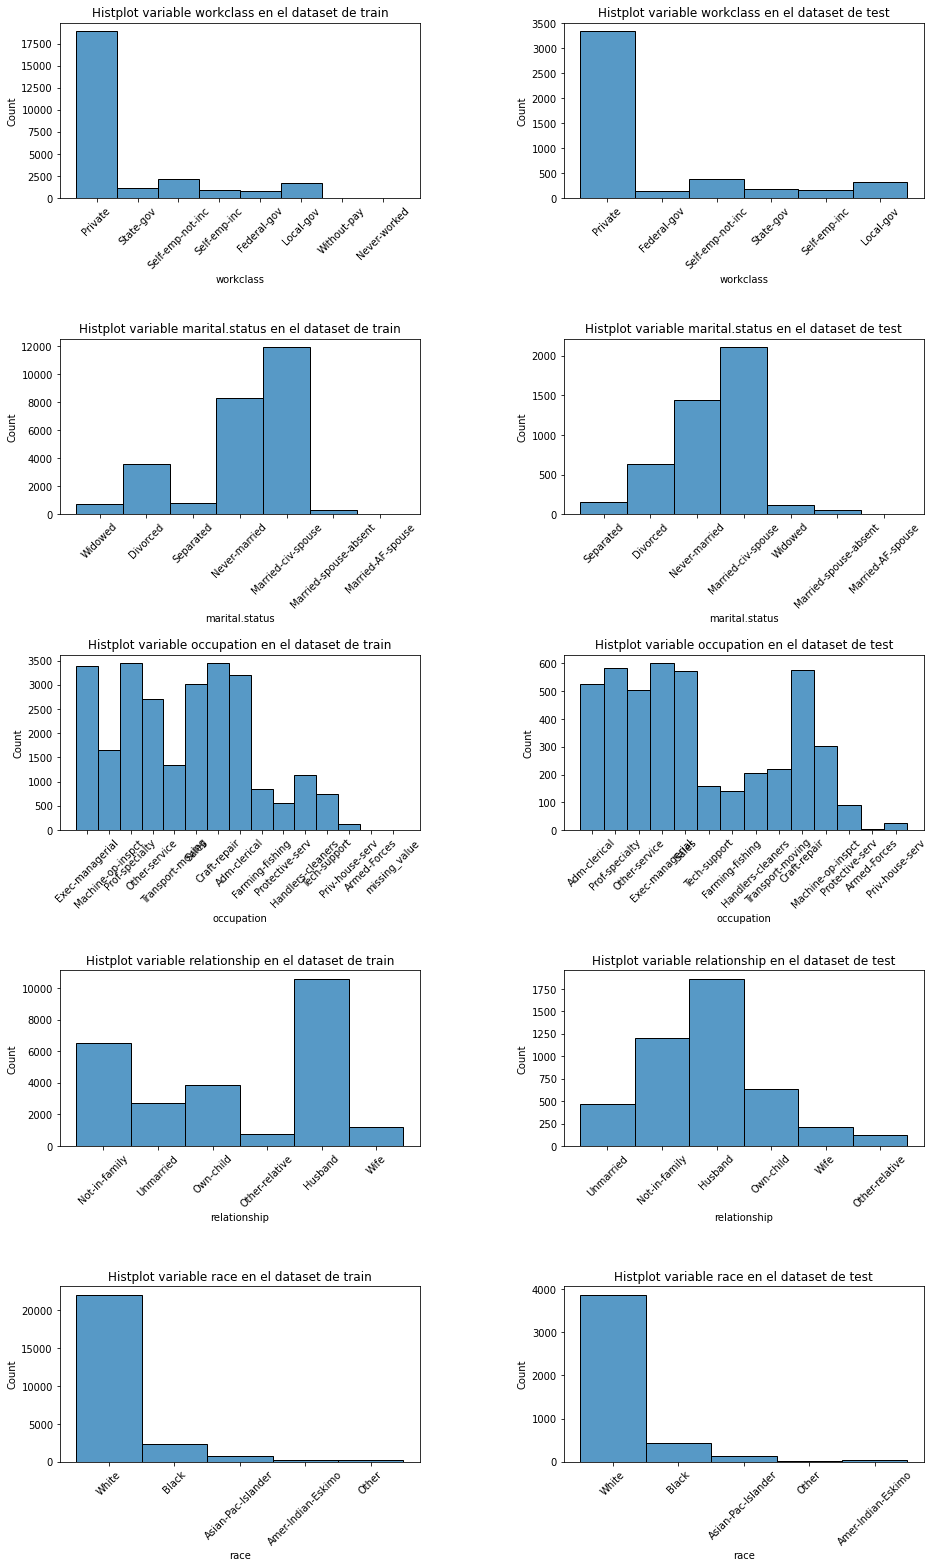

In [ ]:
fig, axes = plt.subplots(nrows=len(columna_1), ncols=2, figsize=(15,10))
for index, col in enumerate(columna_1):
  axes[index][0].set_title(f"Histplot variable {col} en el dataset de train")
  sns.histplot(x=df_train[col], ax=axes[index][0])
  axes[index][0].set_xticklabels(df_train[col].unique(), rotation= 45)
  axes[index][1].set_title(f"Histplot variable {col} en el dataset de test")
  sns.histplot(x=df_test[col], ax=axes[index][1])
  axes[index][1].set_xticklabels(df_test[col].unique(), rotation= 45)

plt.subplots_adjust(left=0.1,
                    bottom=0.001, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.8)
plt.show()

Graficaremos por separado la columna 'native.country' ya que requiere de otro tamaño para que sea legible.

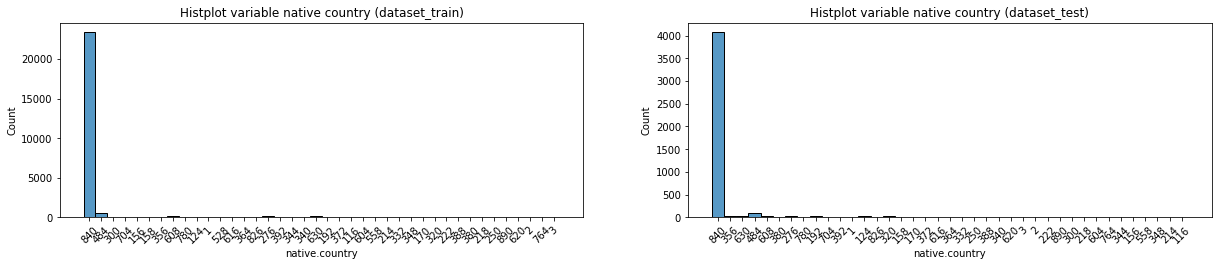

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,3))

axes[0].set_title("Histplot variable native country (dataset_train)")
sns.histplot(x= df_train['native.country'], ax=axes[0])
axes[0].set_xticklabels(df_train['native.country'].unique(), rotation=45)
axes[1].set_title("Histplot variable native country (dataset_test)")
sns.histplot(x= df_test['native.country'], ax=axes[1])
axes[1].set_xticklabels(df_test['native.country'].unique(), rotation=45)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.2, 
                    hspace=0.4)
plt.show()

Recordemos que el código "840" corresponde a EEUU.

### Análisis variables numéricas

In [ ]:
df_train.describe()

,ID,age,education.num,capital.gain,capital.loss,hours.per.week,income_>50K
count,25636.00000,25636.000000,25636.000000,25636.000000,25636.000000,25636.000000,25636.000000
mean,16250.37225,38.458886,10.131183,1114.421751,88.941645,40.928850,0.250429
std,9402.64443,13.160938,2.544504,7501.137285,405.874808,12.024561,0.433269
min,1.00000,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,8110.75000,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,16273.50000,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,24391.25000,47.000000,13.000000,0.000000,0.000000,45.000000,1.000000
max,32535.00000,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [ ]:
df_test.describe()

,ID,age,education.num,capital.gain,capital.loss,hours.per.week
count,4510.000000,4510.000000,4510.00000,4510.000000,4510.000000,4510.000000
mean,16214.412417,38.316408,10.06918,968.475610,85.450776,40.948559
std,9339.071949,12.973056,2.57392,6855.988791,395.947175,11.730205
min,6.000000,17.000000,1.00000,0.000000,0.000000,1.000000
25%,8241.250000,28.000000,9.00000,0.000000,0.000000,40.000000
50%,16088.500000,37.000000,10.00000,0.000000,0.000000,40.000000
75%,24262.500000,47.000000,12.00000,0.000000,0.000000,45.000000
max,32536.000000,90.000000,16.00000,99999.000000,3770.000000,99.000000


In [ ]:
df1_train= df_train[['age','education.num','capital.gain','capital.loss','hours.per.week','income_>50K']].copy()
df1_test= df_test[['age','education.num','capital.gain','capital.loss','hours.per.week']].copy()


Comenzaremos el análisis con el dataset de train y a continuación seguiremos con el de test.

In [ ]:
columna_2 = df1_train.columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

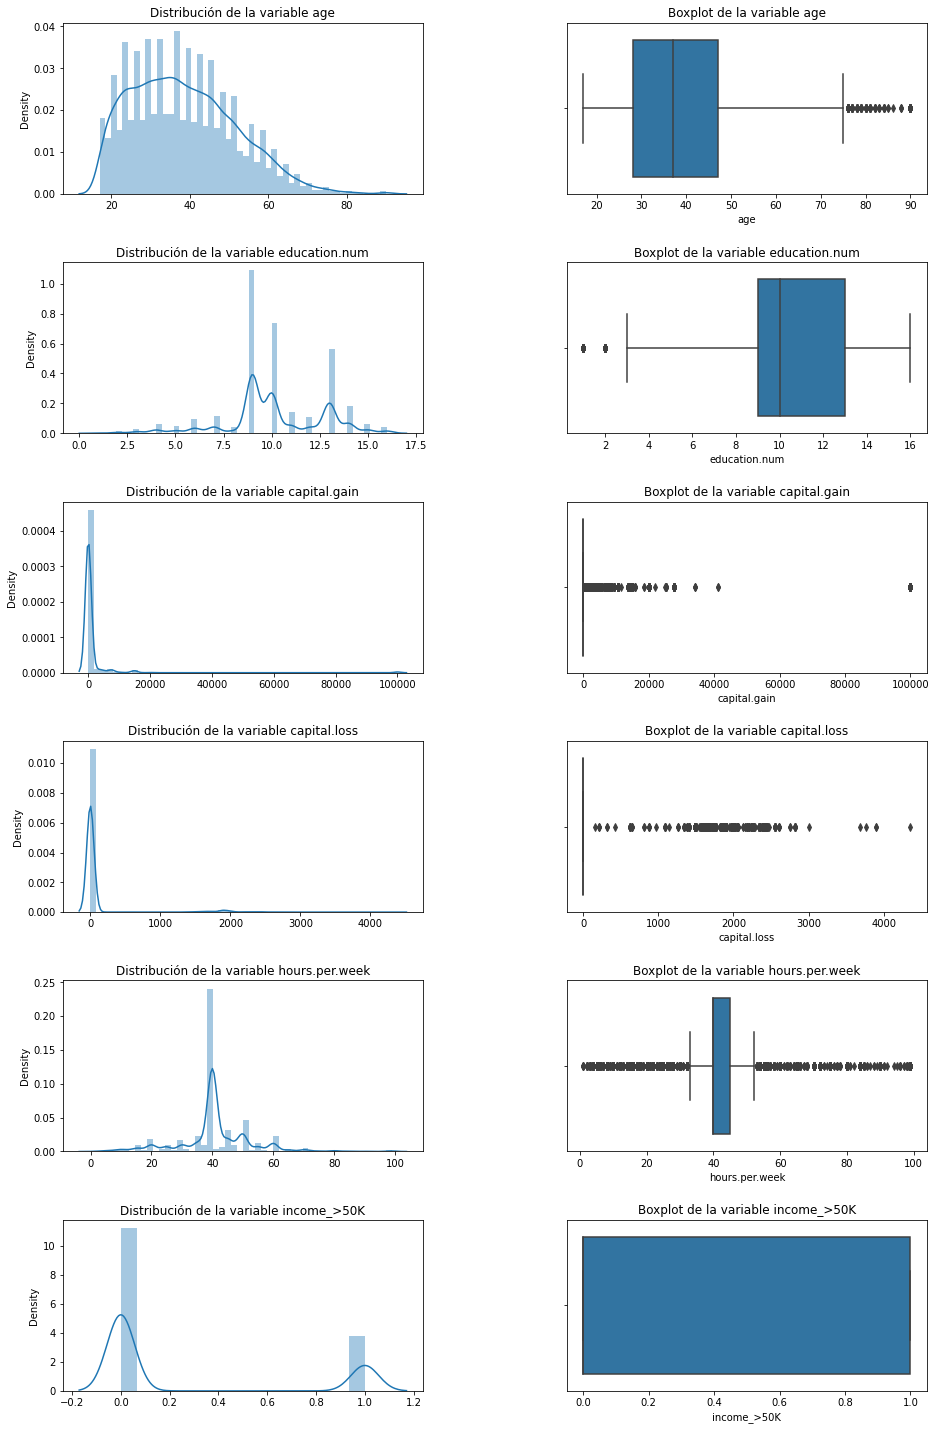

In [ ]:
fig, axes = plt.subplots(nrows=len(columna_2), ncols=2, figsize=(15,10))
for index, col in enumerate(columna_2):
  axes[index][0].set_title(f"Distribución de la variable {col}")
  sns.distplot(x=df1_train[col], ax=axes[index][0])
  axes[index][1].set_title(f"Boxplot de la variable {col}")
  sns.boxplot(x=df1_train[col], ax=axes[index][1])
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Seguidamente, removeremos los outliers de todas estas variables, como claramente se vé que hay en los diagramas de caja y bigotes anteriormente graficados (boxplots).

In [ ]:
def remove_outliers(df:pd.DataFrame,columna:str)->pd.DataFrame:
  for item in columna:
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    MIN = Q1 - 1.5 * IQR
    MAX = Q3 + 1.5 * IQR
    df_limpio = df[(df[columna] > MIN) & (df[columna] < MAX)]
    return df_limpio

In [ ]:
df1_train = remove_outliers(df1_train,columna_2)
df1_train.head()

,age,education.num,capital.gain,capital.loss,hours.per.week,income_>50K
0,NaN,9.0,NaN,NaN,NaN,0
1,54.0,4.0,NaN,NaN,40.0,0
2,41.0,10.0,NaN,NaN,40.0,0
3,34.0,9.0,NaN,NaN,45.0,0
4,74.0,16.0,NaN,NaN,NaN,1


In [ ]:
round(df1_train.isnull().mean()*100,2)

age                 0.57
education.num       1.55
capital.gain      100.00
capital.loss      100.00
hours.per.week     26.46
income_>50K         0.00
dtype: float64

Lo que haremos, tras lo evidenciado arriba, es eliminar las columnas 'capital.gain' y 'capital.loss'. Seguidamente estudiaremos las otras tres.

In [ ]:
df1_train = df1_train.drop(['capital.gain','capital.loss'], axis =1)

In [ ]:
columna_3 = ['age','education.num','hours.per.week']

In [ ]:
def medidas_de_resumen(df,columna):
  for item in columna:
    media_item = round(df[item].mean(),2)
    mediana_item = df[item].median()
    moda_item = pd.Series(df[item].values.flatten()).mode()[0]
    print(f'Para {item}\n La media es: {media_item} \n La mediana es: {mediana_item} \n La moda es: {moda_item}')

In [ ]:
 medidas_de_resumen(df1_train,columna_3)

Para age
 La media es: 38.21 
 La mediana es: 37.0 
 La moda es: 36.0
Para education.num
 La media es: 10.25 
 La mediana es: 10.0 
 La moda es: 9.0
Para hours.per.week
 La media es: 41.64 
 La mediana es: 40.0 
 La moda es: 40.0


En función a las distribuciones graficadas más arriba, imputaremos los valores faltantes con la mediana en el caso de las columnas 'age' y 'education.num' y con la moda en el caso de la columna 'hours.per.week'.

In [ ]:
simple_imp_1 = SimpleImputer(missing_values=np.nan, strategy='median')
simple_imp_1.fit(df1_train[['age']])

SimpleImputer(strategy='median')

In [ ]:
df1_train['age'] =simple_imp_1.transform(df1_train[['age']]) 

In [ ]:
simple_imp_2 = SimpleImputer(missing_values=np.nan, strategy='median')
simple_imp_2.fit(df1_train[['education.num']]) 

SimpleImputer(strategy='median')

In [ ]:
df1_train['education.num'] =simple_imp_2.transform(df1_train[['education.num']]) 

In [ ]:
simple_imp_3 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
simple_imp_3.fit(df1_train[['hours.per.week']]) 

SimpleImputer(strategy='most_frequent')

In [ ]:
df1_train['hours.per.week'] =simple_imp_3.transform(df1_train[['hours.per.week']]) 

In [ ]:
round(df1_train.isnull().mean()*100,2)

age               0.0
education.num     0.0
hours.per.week    0.0
income_>50K       0.0
dtype: float64

A continuación repetiremos lo que hicimos pero ahora sobre el dataset de test.

In [ ]:
columna_4 = df1_test.columns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

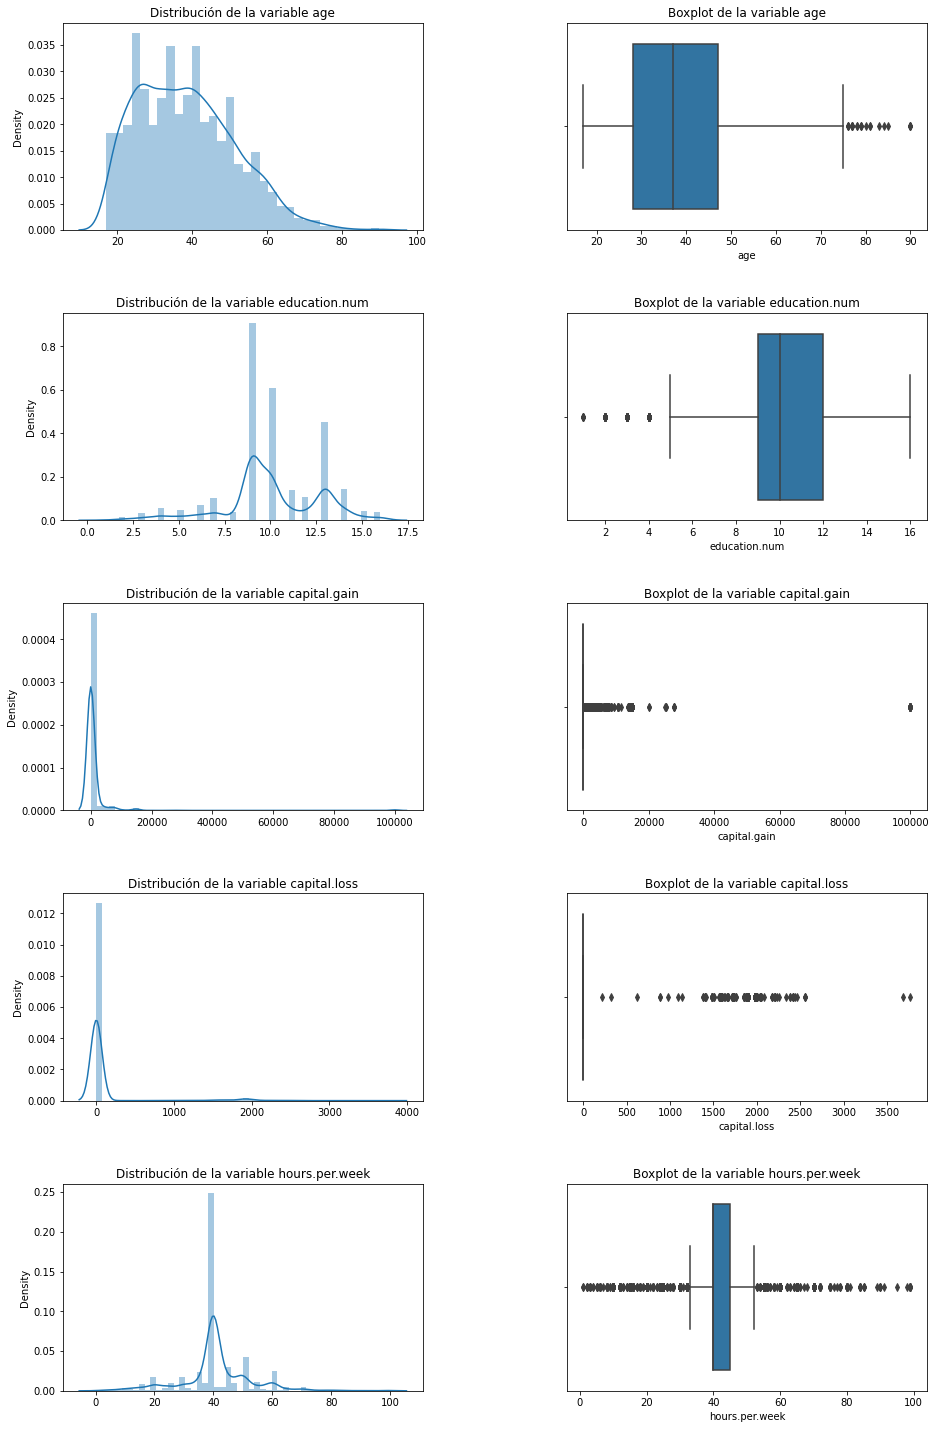

In [ ]:
fig, axes = plt.subplots(nrows=len(columna_4), ncols=2, figsize=(15,10))
for index, col in enumerate(columna_4):
  axes[index][0].set_title(f"Distribución de la variable {col}")
  sns.distplot(x=df1_test[col], ax=axes[index][0])
  axes[index][1].set_title(f"Boxplot de la variable {col}")
  sns.boxplot(x=df1_test[col], ax=axes[index][1])
  
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=2, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

In [ ]:
df1_test = remove_outliers(df1_test,columna_4)
df1_test.head()

,age,education.num,capital.gain,capital.loss,hours.per.week
0,38.0,6.0,NaN,NaN,40.0
1,68.0,9.0,NaN,NaN,40.0
2,23.0,10.0,NaN,NaN,40.0
3,51.0,13.0,NaN,NaN,50.0
4,60.0,9.0,NaN,NaN,50.0


In [ ]:
round(df1_test.isnull().mean()*100,2)

age                 0.51
education.num       3.88
capital.gain      100.00
capital.loss      100.00
hours.per.week     25.88
dtype: float64

In [ ]:
df1_test = df1_test.drop(['capital.gain','capital.loss'], axis =1)

In [ ]:
medidas_de_resumen(df1_test, columna_3)

Para age
 La media es: 38.1 
 La mediana es: 37.0 
 La moda es: 28.0
Para education.num
 La media es: 10.34 
 La mediana es: 10.0 
 La moda es: 9.0
Para hours.per.week
 La media es: 41.47 
 La mediana es: 40.0 
 La moda es: 40.0


In [ ]:
df1_test['age'] =simple_imp_1.transform(df1_test[['age']]) 
df1_test['education.num'] =simple_imp_2.transform(df1_test[['education.num']]) 
df1_test['hours.per.week'] =simple_imp_3.transform(df1_test[['hours.per.week']]) 

In [ ]:
round(df1_test.isnull().mean()*100,2)

age               0.0
education.num     0.0
hours.per.week    0.0
dtype: float64

Grafiquemos con un countplot nuestro target

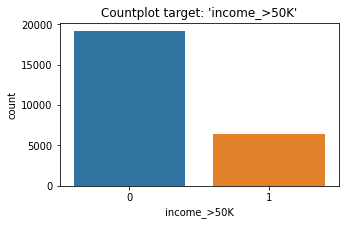

0    19216
1     6420
Name: income_>50K, dtype: int64


In [ ]:
fig = plt.figure(figsize=(5,3))
ax = plt.axes()
sns.countplot(x= 'income_>50K', data= df1_train)
plt.title("Countplot target: 'income_>50K'")
plt.show()
print(df1_train['income_>50K'].value_counts())

Ahora veamos la correlación de las variables contra nuestro target.

In [ ]:
cmap = sns.diverging_palette(240, 10, as_cmap=True)

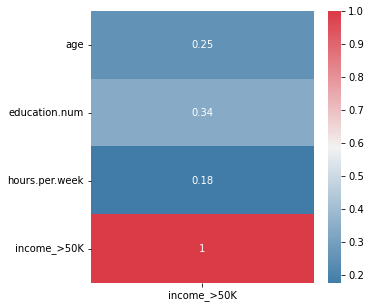

In [ ]:
target_corr = pd.DataFrame(df1_train.corr()['income_>50K'], index= df1_train.corr().index)

plt.figure(figsize=(5,5))
sns.heatmap(target_corr, annot=True, cmap=cmap)

plt.show()

Se puede observar que la variable con mayor correlación con el target (la columna 'income_>50K') es 'education.num', es decir los ingresos de las personas están altamente relacionados con el nivel de estudios alcanzado.

## **Feature** **Engineering**: **Preprocesamiento** **de** **los** **Datos**

Primero borrarenos de nuestro dataframe original (df) las columnas numéricas para seguidamente concatenar dicho dataframe con el dataframe definido y trabajado anteriormente sobre dichas columnas (df1).

In [ ]:
df_train = df_train.drop(['age','education.num','capital.gain','capital.loss','hours.per.week','income_>50K'], axis = 1)
df_test = df_test.drop(['age','education.num','capital.gain','capital.loss','hours.per.week'], axis = 1)

In [ ]:
df2_train = pd.concat([df_train.reset_index(drop=True), df1_train], axis = 1)
df2_test = pd.concat([df_test.reset_index(drop=True), df1_test], axis = 1)


Usaremos un Apply para transformar las columnas numéricas que están con datos flotantes a valores enteros.

In [ ]:
for i in columna_3:
  df2_train[i] = df2_train[i].apply(lambda x: int(x))

In [ ]:
df2_train.head()

,ID,workclass,marital.status,occupation,relationship,race,sex,native.country,age,education.num,hours.per.week,income_>50K
0,1,Private,Widowed,Exec-managerial,Not-in-family,White,Female,840,37,9,40,0
1,3,Private,Divorced,Machine-op-inspct,Unmarried,White,Female,840,54,4,40,0
2,4,Private,Separated,Prof-specialty,Own-child,White,Female,840,41,10,40,0
3,5,Private,Divorced,Other-service,Unmarried,White,Female,840,34,9,45,0
4,7,State-gov,Never-married,Prof-specialty,Other-relative,White,Female,840,74,16,40,1


In [ ]:
df2_test = df2_test.dropna(axis = 0)

In [ ]:
columna_5 = ['ID','age','education.num','hours.per.week']

In [ ]:
for i in columna_5:
  df2_test[i] = df2_test[i].apply(lambda x: int(x))

In [ ]:
df2_test.head()

,ID,workclass,marital.status,occupation,relationship,race,sex,native.country,age,education.num,hours.per.week
0,6,Private,Separated,Adm-clerical,Unmarried,White,Male,840,38,6,40
1,8,Federal-gov,Divorced,Prof-specialty,Not-in-family,White,Female,840,68,9,40
2,30,Private,Separated,Other-service,Not-in-family,White,Male,840,23,10,40
3,33,Private,Divorced,Exec-managerial,Not-in-family,White,Male,840,51,13,50
4,34,Self-emp-not-inc,Never-married,Exec-managerial,Not-in-family,Black,Male,840,60,9,50


A continuación, terminaremos de preprocesar los datos (porque ya comenzamos con ciertas columnas en el apartado de arriba, es el caso de las columnas 'native.country' e 'income_>50K'). Concretamente, en este apartado, transformaremos variables categóricas a numéricas.

Vaemos primero los valores que poseen cada una de ellas.

In [ ]:
columns_cat = ['workclass', 'marital.status','occupation','relationship','race', 'sex']

In [ ]:
print('Valores en variables categóricas')
for i in columns_cat:
  values = df2_train[i].unique()
  print(f"'{i}'  {values}")
  print("-----------------------------------")

Valores en variables categóricas
'workclass'  ['Private' 'State-gov' 'Self-emp-not-inc' 'Self-emp-inc' 'Federal-gov'
 'Local-gov' 'Without-pay' 'Never-worked']
-----------------------------------
'marital.status'  ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
-----------------------------------
'occupation'  ['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Transport-moving' 'Sales' 'Craft-repair' 'Adm-clerical'
 'Farming-fishing' 'Protective-serv' 'Handlers-cleaners' 'Tech-support'
 'Priv-house-serv' 'Armed-Forces' 'missing_value']
-----------------------------------
'relationship'  ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']
-----------------------------------
'race'  ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' 'Other']
-----------------------------------
'sex'  ['Female' 'Male']
-----------------------------------


De todas ellas, decidimos eliminar la columna 'relationship' dado que dicha información ya se encuentra contemplada en la columna 'marital.status' que por lo general es el dato que se registra.

In [ ]:
df2_train = df2_train.drop('relationship', axis = 1)
df2_test = df2_test.drop('relationship', axis = 1)

A las primeras 4 columnas mencionadas arriba ('workclass', 'marital.status', 'occupation', 'race') les haremos un label encoder dado que ninguna de ellas requiere de un orden especial, en tanto que a la última columna ('sex') le aplicaremos un one hot encoder (eliminando, seguidamente, dicha columna 'sex' y al ser binaria, una de las resultantes).

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoded_columns = df2_train[['workclass','marital.status','occupation','race']].columns

In [ ]:
le = LabelEncoder()
for item in label_encoded_columns:
  le.fit(df2_train[[item]])
  df2_train[item] = le.transform(df2_train[[item]])
  df2_test[item] = le.transform(df2_test[[item]])

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
enc = OneHotEncoder(sparse=False)
enc.fit(df2_train.sex.values.reshape(-1, 1))

OneHotEncoder(sparse=False)

In [ ]:
encoded_sex_train= enc.transform(df2_train.sex.values.reshape(-1, 1))
encoded_sex_test= enc.transform(df2_test.sex.values.reshape(-1, 1))

In [ ]:
encoded_sex_train_columns = enc.get_feature_names(['Género'])
encoded_sex_test_columns = enc.get_feature_names(['Género'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
encoded_sex_df_train= pd.DataFrame(data=encoded_sex_train, columns= encoded_sex_train_columns, dtype=int)
encoded_sex_df_test= pd.DataFrame(data=encoded_sex_test, columns= encoded_sex_test_columns, dtype=int)


In [ ]:
df3_train = pd.concat([df2_train.reset_index(drop=True), encoded_sex_df_train], axis=1).drop(['sex','Género_Female'], axis = 1)
df3_test = pd.concat([df2_test.reset_index(drop=True), encoded_sex_df_test], axis=1).drop(['sex','Género_Female'], axis = 1)

In [ ]:
df3_train.isna().sum()

ID                0
workclass         0
marital.status    0
occupation        0
race              0
native.country    0
age               0
education.num     0
hours.per.week    0
income_>50K       0
Género_Male       0
dtype: int64

In [ ]:
df3_test.isna().sum()

ID                0
workclass         0
marital.status    0
occupation        0
race              0
native.country    0
age               0
education.num     0
hours.per.week    0
Género_Male       0
dtype: int64

Mantengamos el órden de las columnas de dataframe original.

In [ ]:
df3_train = df3_train.reindex(columns=['ID','age', 'education.num','workclass', 'marital.status', 'occupation', 'race','Género_Male','native.country','income_>50K'])
df3_test = df3_test.reindex(columns=['ID','age', 'education.num','workclass', 'marital.status', 'occupation', 'race','Género_Male','native.country'])

In [ ]:
df3_train.head()

,ID,age,education.num,workclass,marital.status,occupation,race,Género_Male,native.country,income_>50K
0,1,37,9,3,6,3,4,0,840,0
1,3,54,4,3,0,6,4,0,840,0
2,4,41,10,3,5,9,4,0,840,0
3,5,34,9,3,0,7,4,0,840,0
4,7,74,16,6,4,9,4,0,840,1


In [ ]:
df3_test.head()

,ID,age,education.num,workclass,marital.status,occupation,race,Género_Male,native.country
0,6,38,6,3,5,0,4,1,840
1,8,68,9,0,0,9,4,0,840
2,30,23,10,3,5,7,4,1,840
3,33,51,13,3,0,3,4,1,840
4,34,60,9,5,4,3,2,1,840


Con ésto hemos finalizado el preprocesamiento del dataset. Ahora nos encontramos en condiciones de generar los modelos predictivos.

## **Analisis de Modelos de Clasificación**

Seguidamente desarrollaremos los dos modelos de clasificación vistos en clase, a saber:'DecisionTreeClassifier' y 'KNeighborsClassifier'. Y analizaremos cuál es la métrica más idónea a aplicar.

Comenzaremos haciendo un Train - Test split a nuestro set de datos (train_csv). Dejaremos un 20% de los datos reservados para test y emplearemos un random_state = 42. 

In [ ]:
X = df3_train.drop(['income_>50K'], axis = 1)
y= df3_train['income_>50K'].copy()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20508, 9)
(5128, 9)
(20508,)
(5128,)



### Árboles de decision




In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
max_depths =np.arange(1,20)

In [ ]:
train_score = []
test_score = []

In [ ]:
for i in max_depths:
  tree = DecisionTreeClassifier(max_depth=i)
  tree.fit(X_train, y_train)
  train_pred = tree.predict(X_train)
  test_pred = tree.predict(X_test)
  train_score.append(f1_score(y_train, train_pred))
  test_score.append(f1_score(y_test, test_pred))

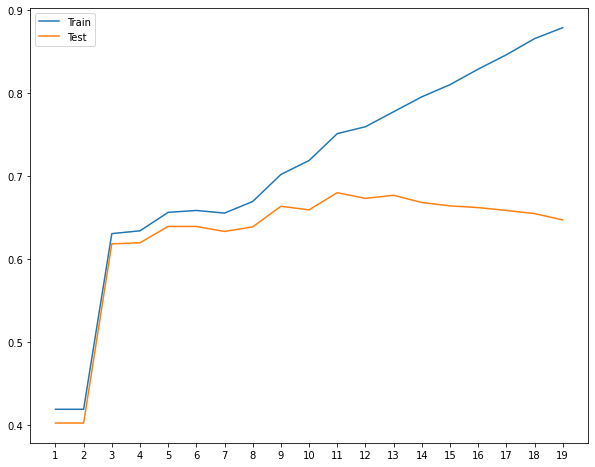

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(max_depths, train_score, label='Train')
plt.plot(max_depths, test_score, label ='Test')
plt.xticks(max_depths)
plt.legend()
plt.show()

En función al gráfico superior, escogemos max_depth = 7 dado que las curvas no se separan mucho una de la otra y el error es el menor (si lo comparásemos con, por ejemplo, los max_depths anteriores, del 1 al 4).

In [ ]:
tree = DecisionTreeClassifier(max_depth=7)
tree.fit(X_train, y_train)
train_pred = tree.predict(X_train)
test_pred = tree.predict(X_test)

In [ ]:
f1_score(y_train, train_pred)

0.6555464831447567

In [ ]:
f1_score(y_test, test_pred)

0.6334117647058823

Midiremos el accuracy_score y realizaremos un cross validation.

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(y_train, train_pred)

0.8560074117417593

In [ ]:
accuracy_score(y_test, test_pred)

0.8480889235569423

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
 score_tree_train= cross_val_score(tree, X_train,y_train, cv=5)
 score_tree_train.mean()

0.8493757394202053

In [ ]:
score_tree_test= cross_val_score(tree, X_test,y_test, cv=5)
score_tree_test.mean()

0.8352172300670375

Determinemos el AUC_ROC

In [ ]:
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


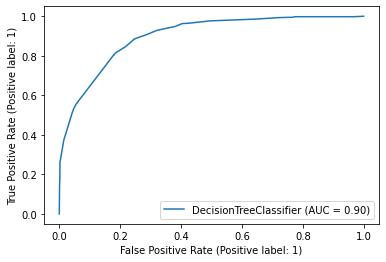

In [ ]:
metrics.plot_roc_curve(tree, X_test, y_test)
plt.show()

   
### KNN



En KNN es importante escalar los datos, por lo que es lo que haremos seguidamente con X_train y X_test. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
knn_lista= np.arange(1,20)

In [ ]:
train_score = []
test_score = []

In [ ]:
for i in knn_lista:
  knn = KNeighborsClassifier(n_neighbors= i, weights='uniform')
  knn.fit(X_train,y_train)
  train_pred = knn.predict(X_train)
  test_pred = knn.predict(X_test)
  train_score.append(f1_score(y_train,train_pred))
  test_score.append(f1_score(y_test,test_pred))

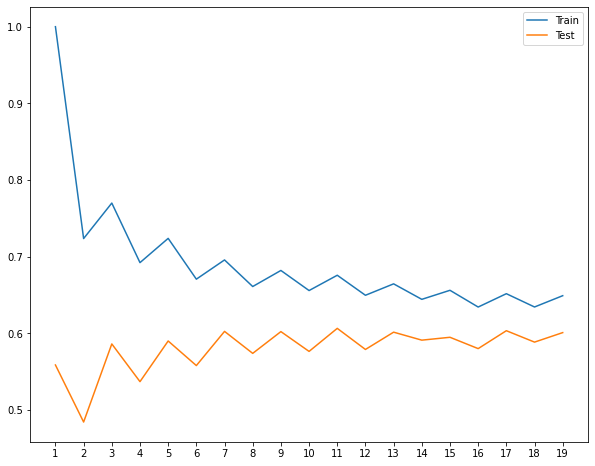

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(knn_lista, train_score, label='Train')
plt.plot( knn_lista, test_score, label ='Test')
plt.xticks(knn_lista)
plt.legend()
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 14, weights='uniform')
knn.fit(X_train,y_train)
train_pred = knn.predict(X_train)
test_pred = knn.predict(X_test)

In [ ]:
f1_score(y_train,train_pred)

0.6443486907524031

In [ ]:
f1_score(y_test,test_pred)

0.591111111111111

Midiremos el accuracy_score y realizaremos un cross validation.

In [ ]:
accuracy_score(y_train, train_pred)

0.8430368636629608

In [ ]:
accuracy_score(y_test, test_pred)

0.8205928237129485

In [ ]:
 score_knn_train= cross_val_score(knn, X_train,y_train, cv=5)
 score_knn_train.mean()

0.8226541171356928

In [ ]:
score_knn_test= cross_val_score(knn, X_test,y_test,cv=5)
score_knn_test.mean()

0.8055739076689011

Determinemos el AUC_ROC

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


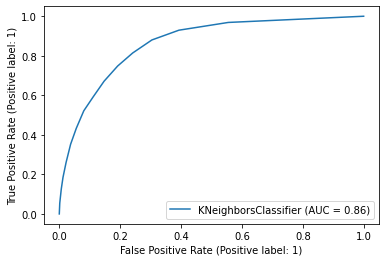

In [ ]:
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

## **Conclusión**

Se escoge como modelo predictivo el DecisionTreeClassifier dado que es el que presenta mejor performance. El Δf1_score entre train y test es menor en este modelo y con valores más elevados. El accuracy_score del árbol es también más elevado respecto al otro modelo analizado. Finalmente, logra una mejor diferenciación entre clases dado el mayor valor alcanzado del AUC_ROC. Por lo que el DecisionTreeClassifier (una vez determinado sus parámetros óptimos y entrenado) es el modelo predictivo seleccionado para predecir si una persona (correspondiente a un determinado "ID") tiene un salario anual mayor a 50K dólares (correspondiente a '1' en la columna "PRED") o no (correspondiente a '0' en dicha columna).
De esta manera, a continuación se aplicará el mencionado modelo para obtener las predicciones buscadas sobre el dataset de test.

In [ ]:
X = df3_test.copy()

In [ ]:
df3_test['PRED'] = tree.predict(X)
df3_test.head()


,ID,age,education.num,workclass,marital.status,occupation,race,Género_Male,native.country,PRED
0,6,38,6,3,5,0,4,1,840,0
1,8,68,9,0,0,9,4,0,840,1
2,30,23,10,3,5,7,4,1,840,0
3,33,51,13,3,0,3,4,1,840,1
4,34,60,9,5,4,3,2,1,840,1


In [ ]:
df4 = df3_test[['ID','PRED']].copy()
df4.head()

,ID,PRED
0,6,0
1,8,1
2,30,0
3,33,1
4,34,1


In [ ]:
df4.to_csv('/content/drive/MyDrive/Data_Science_2021/Entregas/Entrega _1/test_predecido_Yani.csv', header=True, index=False)

- [test_predecido_Yani.csv](https://drive.google.com/file/d/1-2OR0OuKElN9972iweXgJFu7YFdhd2_E/view?usp=sharing)



[test_predecido_Yani.csv](https://drive.google.com/file/d/1-2OR0OuKElN9972iweXgJFu7YFdhd2_E/view?usp=sharing)


